<a href="https://colab.research.google.com/github/SergioCortes98/Aprendizaje-Automatico/blob/main/Tarea_6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#TAREA 6
## Sergio Cortes Cepeda
##Matricula:1731225

In [2]:
import pandas as pd
import numpy as np
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

# Cargar tus datos
ruta = "/content/sample_data/run_activitiesAA.csv"
df = pd.read_csv(ruta, encoding='latin-1')
df.head(48)

,Tipo de actividad,Fecha,TÃ­tulo,Distancia,CalorÃ­as,Tiempo,Frecuencia cardiaca media,FC mÃ¡xima,Cadencia de carrera media,Cadencia de carrera mÃ¡xima,...,Ascenso total,Descenso total,Longitud media de zancada,Pasos,Mejor tiempo de vuelta,NÃºmero de vueltas,Tiempo en movimiento,Tiempo transcurrido,Altura mÃ­nima,Altura mÃ¡xima
0,Carrera,09/11/2025 07:06,Monterrey Carrera,30.43,"2,435",03:13:09,173,190,173,185,...,225,225,0.91,"33,436",02:58.7,31,03:12:22,03:13:09,515,574
1,Carrera,02/11/2025 06:47,San Pedro Garza GarcÃ­a Carrera,7.45,573,00:44:38,164,176,175,188,...,--,--,0.95,"7,896",03:03.5,8,00:44:28,00:44:38,598,602
2,Carrera,26/10/2025 06:37,Guadalupe Carrera,14.74,"1,235",01:32:22,176,191,169,188,...,181,180,0.94,"15,654",04:42.0,15,01:32:19,01:32:22,482,531
3,Carrera,05/10/2025 07:07,San Pedro Garza GarcÃ­a Carrera,12.12,990,01:14:00,174,191,167,177,...,173,172,0.98,"12,384",00:45.8,13,01:13:49,01:14:00,593,639
4,Carrera,07/06/2025 08:23,Carrera,2.61,256,00:19:22,164,184,162,224,...,--,--,0.83,"3,150",04:22.9,3,00:19:17,00:19:22,--,--
5,Carrera,06/06/2025 19:43,San NicolÃ¡s de los Garza Carrera,2.73,307,00:24:49,163,189,138,176,...,--,--,0.78,"3,564",01:36.9,10,00:23:59,00:24:49,496,498
6,Entrenamiento en cinta,11/05/2025 12:24,Entrenamiento en cinta,10.27,789,01:00:06,165,177,160,173,...,--,--,1.01,"9,662",04:39.6,10,00:59:33,01:00:06,--,--
7,Entrenamiento en cinta,20/04/2025 15:05,Entrenamiento en cinta,4.70,409,00:30:02,169,185,156,185,...,--,--,0.66,"4,666",04:13.1,5,00:29:53,00:30:03,--,--
8,Carrera,06/04/2025 12:48,San NicolÃ¡s de los Garza Carrera,3.75,296,00:26:48,153,179,160,180,...,7,14,0.87,"4,316",05:58.6,4,00:26:47,00:26:48,487,499
9,Carrera en interiores,29/03/2025 08:19,Carrera en interiores,3.95,256,00:23:22,145,169,155,198,...,--,--,1.08,"3,662",00:00.8,8,00:20:53,00:40:25,--,--


In [3]:
# Renombrar columnas

df = df.rename(columns={
    "Tipo de actividad": "tipo",
    "Fecha": "fecha",
    "TÃ­tulo": "titulo",
    "Distancia": "distancia_km",
    "CalorÃ­as": "calorias",
    "Tiempo": "Tiempo_Total",
    "Frecuencia cardiaca media": "fc_media",
    "FC mÃ¡xima": "fc_max",
    "Cadencia de carrera media": "cadencia_media",
    "Cadencia de carrera mÃ¡xima": "cadencia_max",
    "Ritmo medio": "ritmo_medio",
    "Ritmo Ã³ptimo": "ritmo_optimo",
    "Ascenso total": "ascenso",
    "Descenso total": "descenso",
    "Longitud media de zancada": "zancada_m",
    "Pasos": "pasos",
    "Mejor tiempo de vuelta": "mejor_vuelta",
    "NÃºmero de vueltas": "num_vueltas",
    "Tiempo en movimiento": "tiempo_mov",
    "Tiempo transcurrido": "tiempo_trans",
    "Altura mÃ­nima": "alt_min",
    "Altura mÃ¡xima": "alt_max"
})
df.columns

Index(['tipo', 'fecha', 'titulo', 'distancia_km', 'calorias', 'Tiempo_Total',
       'fc_media', 'fc_max', 'cadencia_media', 'cadencia_max', 'ritmo_medio',
       'ritmo_optimo', 'ascenso', 'descenso', 'zancada_m', 'pasos',
       'mejor_vuelta', 'num_vueltas', 'tiempo_mov', 'tiempo_trans', 'alt_min',
       'alt_max'],
      dtype='object')

In [4]:
print(df.dtypes)

tipo               object
fecha              object
titulo             object
distancia_km      float64
calorias           object
Tiempo_Total       object
fc_media            int64
fc_max              int64
cadencia_media      int64
cadencia_max        int64
ritmo_medio        object
ritmo_optimo       object
ascenso            object
descenso           object
zancada_m         float64
pasos              object
mejor_vuelta       object
num_vueltas         int64
tiempo_mov         object
tiempo_trans       object
alt_min            object
alt_max            object
dtype: object


In [5]:
import numpy as np
import pandas as pd

## Columnas que deben ser numéricas
cols_numericas = [
    "pasos","calorias","alt_min", "alt_max"
]

## Limpieza y conversión
for col in cols_numericas:
    if col in df.columns:
        df[col] = (
            df[col]
            .astype(str)                   # convierte todo a texto
            .str.replace(",", "", regex=False)  # elimina comas
            .str.replace("--", "", regex=False) # elimina guiones
            .str.replace(":", ".", regex=False) # cambia ":" por "." si aplica
            .str.strip()                        # quita espacios
            .replace("", np.nan)                # convierte vacíos en NaN
        )
        df[col] = pd.to_numeric(df[col], errors="coerce")  #conversión a numérico

## Verificación
print(df[cols_numericas].dtypes)

pasos         int64
calorias      int64
alt_min     float64
alt_max     float64
dtype: object


In [6]:
def time_convert(x):
    x = str(x).strip()

    if x in ["", "-", "--", "nan", "NaN"]:
        return None

    parts = x.split(":")


    if len(parts) == 3:
        h = int(parts[0])
        m = int(parts[1])
        s = float(parts[2])   # aquí permite decimales
        return int(h*3600 + m*60 + s)
    elif len(parts) == 2:
        h = 0
        m = int(parts[0])
        s = float(parts[1].replace(',', '.'))
        return int(h*3600 + m*60 + s)

In [7]:
df.Tiempo_Total=df.Tiempo_Total.apply(time_convert)

In [8]:
df.ritmo_medio=df.ritmo_medio.apply(time_convert)

In [9]:
df.ritmo_optimo=df.ritmo_optimo.apply(time_convert)

In [10]:
df.tiempo_mov=df.tiempo_mov.apply(time_convert)

In [11]:
df = df.drop(columns=["tiempo_trans", "mejor_vuelta"])

En base a los datos supervisados, se observa una similitud amplia entre el tiempo transcurrido y el tiempo total, por lo cual se toma la decisión de eliminar esta columna.

A su vez tengo 2 columnas tiempo en vueltas y numero de vueltas de las que es un dato inexacto debido a que el número de vueltas es el aproximado al kilómetro, sin embargo el mejor tiempo en vueltas muestra datos que serían físicamente imposibles de aplicar por lo cual, hare omisión de esta columna para poder continuar de manera correcta mi análisis.

In [12]:
#   (Calorías y Ritmo Promedio)

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Variables predictoras
X = df[[
    "distancia_km",
    "Tiempo_Total",
    "fc_media",
    "fc_max",
    "cadencia_media",
    "cadencia_max",
    "zancada_m",
    "pasos",
    "tiempo_mov"
]]
# Variables objetivo
y_cal = df["calorias"]
y_ritmo = df["ritmo_medio"]


# Train-test split
X_train, X_test, y_cal_train, y_cal_test = train_test_split(
    X, y_cal, test_size=0.2, random_state=42)

_, _, y_ritmo_train, y_ritmo_test = train_test_split(
    X, y_ritmo, test_size=0.2, random_state=42)

# Escalado
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 2. Modelos Supervisados

models = {
    "Regresión Lineal": LinearRegression(),
    "Random Forest": RandomForestRegressor(n_estimators=300, random_state=42),
    "KNN": KNeighborsRegressor(n_neighbors=5)
}

# Función de evaluación
def evaluar_modelo(nombre, modelo, Xtr, Xte, ytr, yte):
    modelo.fit(Xtr, ytr)
    pred = modelo.predict(Xte)
    mae = mean_absolute_error(yte, pred)
    mse = mean_squared_error(yte, pred)
    rmse = np.sqrt(mse)
    return [nombre, mae, mse, rmse]



In [13]:
# 3. Evaluación para Calorías
resultados_cal = []
for nombre, modelo in models.items():
    resultados_cal.append(
        evaluar_modelo(nombre, modelo, X_train_scaled, X_test_scaled, y_cal_train, y_cal_test)
    )

tabla_cal = pd.DataFrame(resultados_cal, columns=["Modelo", "MAE", "MSE", "RMSE"])
print("\n=== Modelo para Calorías ===\n")
tabla_cal



=== Modelo para Calorías ===



,Modelo,MAE,MSE,RMSE
0,Regresión Lineal,17.160704,519.698826,22.796904
1,Random Forest,25.737333,1062.510504,32.596173
2,KNN,36.880000,1888.472000,43.456553


El mejor modelo para predecir **Calorías** es la **Regresión Lineal**, ya que tiene el MAE y RMSE más bajos.

Esto significa que, en promedio, la Regresión Lineal se equivoca alrededor de 17 calorías, lo cual es razonable.

In [14]:
# 4. Evaluación para Ritmo Promedio
resultados_ritmo = []
for nombre, modelo in models.items():
    resultados_ritmo.append(
        evaluar_modelo(nombre, modelo, X_train_scaled, X_test_scaled, y_ritmo_train, y_ritmo_test)
    )

tabla_ritmo = pd.DataFrame(resultados_ritmo, columns=["Modelo", "MAE", "MSE", "RMSE"])
print("\n=== Modelo para Ritmo Promedio ===\n")
tabla_ritmo



=== Modelo para Ritmo Promedio ===



,Modelo,MAE,MSE,RMSE
0,Regresión Lineal,38.098955,2174.028887,46.626483
1,Random Forest,30.803333,1543.587138,39.288512
2,KNN,80.520000,20042.280000,141.570760


El mejor modelo para **Ritmo Promedio** es **Random Forest**, porque tiene el MSE y RMSE más bajos.

Esto significa que su error promedio en ritmo es de aprox. 39 segundos por kilómetro.

In [15]:
#  mejores modelos

mejores_modelos = {
    "Calorías - Regresión Lineal": tabla_cal.loc[0],
    "Ritmo Promedio - Random Forest": tabla_ritmo.loc[1]
}

tabla_mejores = pd.DataFrame(mejores_modelos).T
tabla_mejores


,Modelo,MAE,MSE,RMSE
Calorías - Regresión Lineal,Regresión Lineal,17.160704,519.698826,22.796904
Ritmo Promedio - Random Forest,Random Forest,30.803333,1543.587138,39.288512


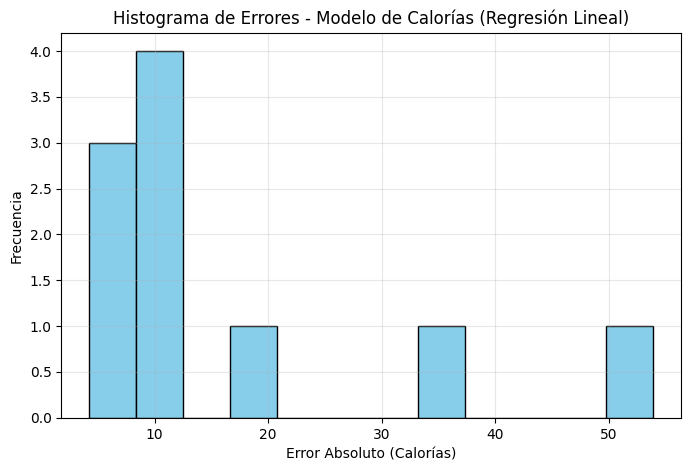

In [16]:
import matplotlib.pyplot as plt

#Histograma de errores para Calorías

# Entrenar modelo ganador
modelo_calorias = LinearRegression()
modelo_calorias.fit(X_train_scaled, y_cal_train)

# Predicciones
pred_calorias = modelo_calorias.predict(X_test_scaled)

# Errores absolutos
errores_cal = np.abs(y_cal_test - pred_calorias)

plt.figure(figsize=(8,5))
plt.hist(errores_cal, bins=12, color='skyblue', edgecolor='black')
plt.title("Histograma de Errores - Modelo de Calorías (Regresión Lineal)")
plt.xlabel("Error Absoluto (Calorías)")
plt.ylabel("Frecuencia")
plt.grid(alpha=0.3)
plt.show()


El histograma muestra que la mayoría de los errores absolutos están concentrados entre 8 y 20 calorías, lo cual indica que el modelo tiene un desempeño estable en la mayor parte de las observaciones.


Se observan algunos errores aislados entre 30 y 55 calorías.
Esto puede deberse a:

Entrenamientos atípicos (ritmos muy lentos o muy rápidos).

Sesiones con datos faltantes/imputados.

Variaciones fuertes en la relación entre distancia, tiempo y esfuerzo.

Estos valores actúan como outliers y podrían investigarse o filtrarse para mejorar el modelo.

El error es bajo en la mayoría de los casos, lo cual coincide con el resultado de las métricas:

MAE ≈ 17.16

RMSE ≈ 22.79

Esto indica que la regresión lineal predice adecuadamente las calorías, aunque aún existe cierta variabilidad no explicada por el modelo lineal.

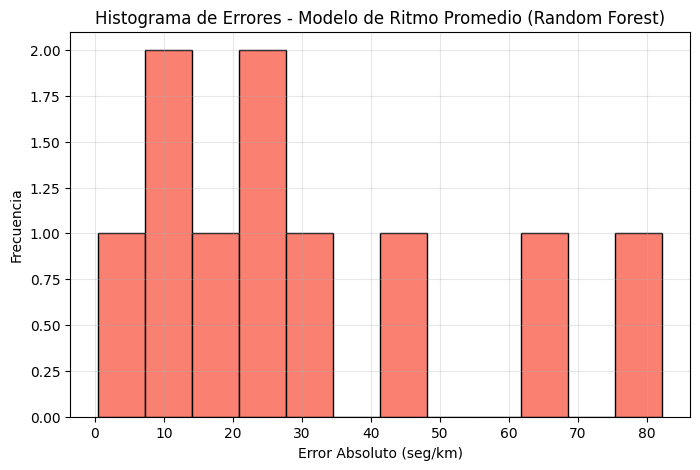

In [17]:
#Histograma de errores para Ritmo Promedio

modelo_ritmo = RandomForestRegressor(n_estimators=300, random_state=42)
modelo_ritmo.fit(X_train_scaled, y_ritmo_train)

pred_ritmo = modelo_ritmo.predict(X_test_scaled)

errores_ritmo = np.abs(y_ritmo_test - pred_ritmo)

plt.figure(figsize=(8,5))
plt.hist(errores_ritmo, bins=12, color='salmon', edgecolor='black')
plt.title("Histograma de Errores - Modelo de Ritmo Promedio (Random Forest)")
plt.xlabel("Error Absoluto (seg/km)")
plt.ylabel("Frecuencia")
plt.grid(alpha=0.3)
plt.show()


El histograma del ritmo promedio muestra errores más dispersos comparado con el de calorías. Los valores se distribuyen aproximadamente entre 5 y 80 segundos por kilómetro, lo que indica que:

El problema es más complejo de modelar.

La relación entre variables y ritmo promedio no es lineal y depende de factores internos del atleta.

Los errores mayores a 50 seg/km sugieren que, en algunos entrenamientos, el modelo no captura adecuadamente variaciones de ritmo asociadas a:

Terreno (subidas/bajadas)

Fatiga acumulada

Estrategia de carrera

Variabilidad cardiaca inusual

Estos casos deberían analizarse por separado.

El modelo Random Forest tiene estos valores:

MAE ≈ 30.8 seg/km

RMSE ≈ 39.2 seg/km

Esto confirma que el modelo presenta mayor dificultad para predecir el ritmo, lo cual es esperable porque es una variable mucho más volátil que las calorías.

En tu tabla:

RF obtiene menor error que KNN

RF obtiene menor error que regresión lineal para el ritmo

Esto refuerza que el ritmo promedio requiere un modelo no lineal.


#Conclusion

Los histogramas de errores muestran que el modelo de regresión lineal es adecuado para predecir calorías, presentando una concentración de errores bajos y pocos valores atípicos. En contraste, la predicción del ritmo promedio presenta una mayor dispersión en los errores, evidenciando su complejidad y la influencia de factores adicionales no considerados en los datos. El modelo Random Forest mostró el mejor desempeño para ritmo, confirmando la necesidad de métodos no lineales cuando la variable objetivo presenta mayor variabilidad.